the equation to integrate

In [82]:
def f(x, y):
    return 1/(x+1) - 5/(y**2 + 1)

eulers method to bootstrap

In [83]:
def euler(x, y, dx):
    return y + dx * f(x, y)

given formula for cowells method

In [84]:
def cowell(x, y, dx, f_grid):
    return y + dx / 24 * (-f_grid[-2] + 13*f_grid[-1] + 13*f(x, y) - f(x+dx, euler(x, y, dx)))

initial condition and step

In [85]:
x, y = 1, 1

dx = 1e-2

initializing with euler

In [86]:
f_grid = []

for i in range(3):

    value = f(x+i*dx, euler(x, y, i*dx))
    
    f_grid.append(value)


performing cowells method

In [87]:
x_values, y_values = [x], [y]

for i in range(int(10//dx)):

    x += dx
    y = cowell(x, y, dx, f_grid)

    f_grid.append(f(x, y))
    f_grid.pop(0)

    x_values.append(x)
    y_values.append(y)

check using scipy

In [89]:
import numpy as np
from scipy.integrate import odeint

def wrapper(y, x):
    return f(x, y)

x, y = 1, 1


scipy_x_values = np.linspace(x, x + 999*dx, 1001)

scipy_y_values = odeint(wrapper, y, scipy_x_values).ravel()


<function matplotlib.pyplot.show(close=None, block=None)>

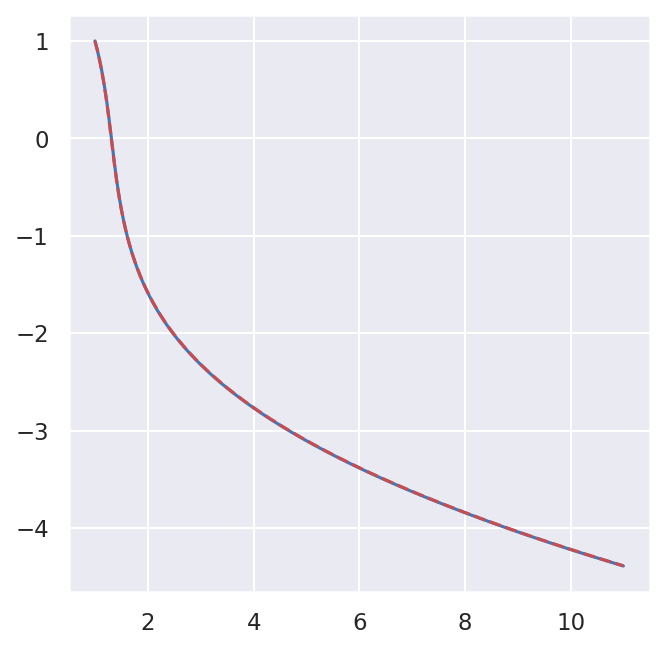

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5), dpi=150)
plt.plot(x_values,y_values, 'b-')
plt.show
plt.plot(scipy_x_values, scipy_y_values, 'r--')
plt.show